In [ ]:
import pandas as pd
df=pd.read_csv("/content/gender_submission (1).csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [ ]:
import numpy as np


In [ ]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("training samples:",x_train.shape)
print("testing samples:",x_test.shape)


training samples: (334, 1)
testing samples: (84, 1)


In [ ]:
from sklearn.svm import SVC

In [66]:
svm_linear=SVC(kernel='poly', class_weight='balanced',C=0.05)
svm_linear.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.05, class_weight='balanced', kernel='poly')

In [67]:
y_pred=svm_linear.predict(x_test)
print(y_pred)
print(y_pred.shape)

[0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 1 1]
(84,)


In [68]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[37  5]
 [ 0 42]]


In [69]:
from sklearn.metrics import f1_score, confusion_matrix

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9438


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9405
Precision: 0.8936
Recall: 1.0000


In [71]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.89      1.00      0.94        42

    accuracy                           0.94        84
   macro avg       0.95      0.94      0.94        84
weighted avg       0.95      0.94      0.94        84



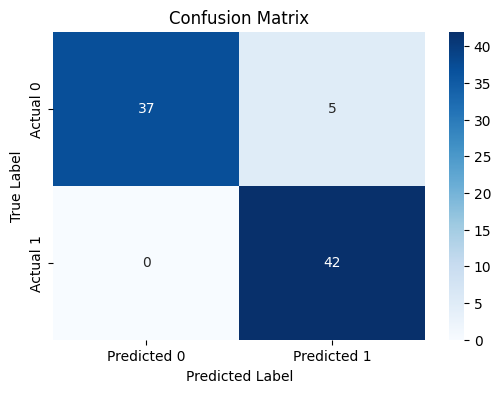

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()